In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf
import numpy as np
import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns


In [26]:
# params
dtfrom = "2019-01-01" #dt.date(2014,1,1)
dtto = "2019-06-01" #dt.date(2017,1,1)

polluant='pm25'


In [27]:
#data = pd.read_csv("..\data\coloane,-macau-air-quality.csv",)
data = pd.read_csv("..\data\parque-central da taipa, macau-air-quality.csv",)
data.date=pd.to_datetime(data.date)
data=data.sort_values('date',ascending=False)
data.index=data.date
data.pop('date')

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
"""
mapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))
data.rename(columns=mapper)
"""
for c in data.columns:
    data[c]= pd.to_numeric(data[c], errors='coerce')
    

date
2021-03-01   2021-03-01
2021-02-28   2021-02-28
2021-02-27   2021-02-27
2021-02-26   2021-02-26
2021-02-25   2021-02-25
                ...    
2014-06-29   2014-06-29
2014-06-28   2014-06-28
2014-06-27   2014-06-27
2014-06-26   2014-06-26
2014-06-25   2014-06-25
Name: date, Length: 2027, dtype: datetime64[ns]

'\nmapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))\ndata.rename(columns=mapper)\n'

In [28]:
if False:
    ProfileReport(data)

<AxesSubplot:xlabel='date'>

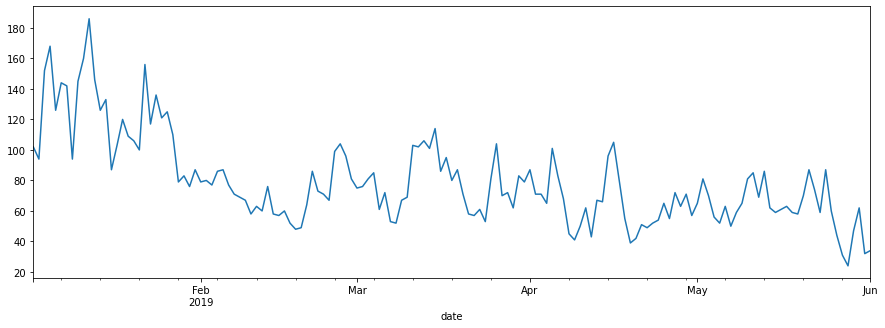

In [29]:

pastpolluant='past'+polluant
df= data[(data.index > dtfrom) & (data.index <= dtto)].copy()

fig,axs=plt.subplots(figsize=(15,5))
df[polluant].plot(ax=axs)
pastpolluants=[]
for pol in data.columns:
    pastpolluants.append( 'past'+pol)
    df[pastpolluants[-1]]=data[pol].shift(1)

In [30]:
df

,pm25,pm10,o3,no2,so2,co,pastpm25,pastpm10,pasto3,pastno2,pastso2,pastco
date,,,,,,,,,,,,
2019-06-01,34.0,29.0,12.0,7.0,NaN,2.0,35.0,29.0,14.0,5.0,NaN,3.0
2019-05-31,32.0,28.0,15.0,6.0,NaN,2.0,34.0,29.0,12.0,7.0,NaN,2.0
2019-05-30,62.0,28.0,19.0,6.0,1.0,3.0,32.0,28.0,15.0,6.0,NaN,2.0
2019-05-29,47.0,45.0,23.0,7.0,1.0,4.0,62.0,28.0,19.0,6.0,1.0,3.0
2019-05-28,24.0,37.0,21.0,10.0,2.0,5.0,47.0,45.0,23.0,7.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-06,126.0,76.0,1.0,20.0,4.0,4.0,144.0,67.0,1.0,15.0,4.0,3.0
2019-01-05,168.0,52.0,6.0,12.0,4.0,4.0,126.0,76.0,1.0,20.0,4.0,4.0
2019-01-04,152.0,71.0,13.0,19.0,4.0,7.0,168.0,52.0,6.0,12.0,4.0,4.0


<AxesSubplot:xlabel='pastpm25', ylabel='pm25'>

<AxesSubplot:xlabel='pastpm25', ylabel='pm25'>

0.6587079670335012

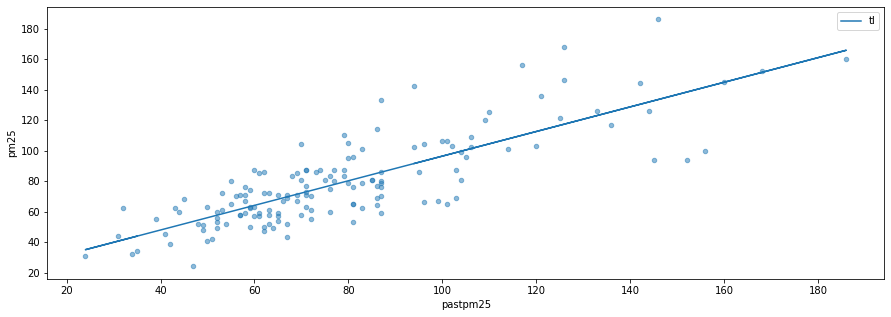

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#regression on polluant self past value

fig,axs= plt.subplots(figsize=(20,10))
regr = linear_model.LinearRegression()
X= df[[pastpolluant,polluant]].dropna(how='any')
X.plot(kind='scatter',ax=axs, x = pastpolluant, y = polluant, figsize=(15,5), alpha =0.5)
y = X.pop(polluant)
regression = regr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
trendln = pd.DataFrame({'tl':regression.predict(X.values.reshape(-1,1)).reshape(1,-1)[0]},index=X.values.reshape(1,-1)[0])
trendln.plot(ax=axs)

regression.score(X, y)


In [32]:
# regression on all past polluants 
regr = linear_model.LinearRegression()

#df[pastpolluants+[polluant]].head()
X= df[pastpolluants+[polluant]].dropna(how='any')
y= pd.DataFrame(X.pop(polluant))
#sns.pairplot(X[pastpolluants+[polluant]])

array([[ 0.61673266,  0.04997231, -0.68726299,  0.58146037,  1.25101567,
        -0.86146183]])

0.6496468806419033

<AxesSubplot:xlabel='date'>

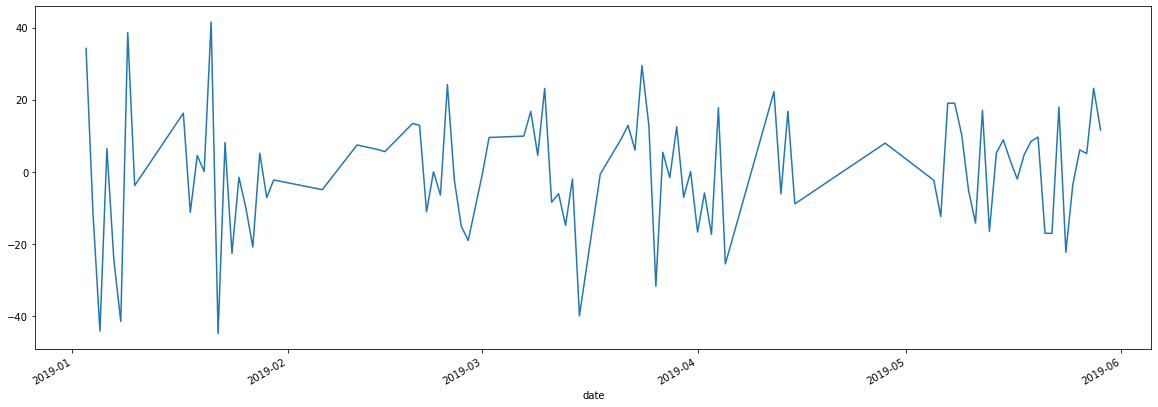

In [33]:
#X.plot(kind='scatter',ax=axs, x = pastpolluants, y =polluant, figsize=(15,5), alpha =0.5)
#y = X.pop(polluant)
regression = regr.fit(X.values,y.values.reshape(-1,1))
y['predicted'] = regression.predict(X.values).reshape(1,-1)[0]
#trendln.plot(ax=axs)
regression.coef_
regression.score(X, y[polluant])
(y['predicted']-y[polluant]).plot(figsize=(20,7))

# add weather features

In [34]:
smgdata = pd.read_csv("..\data\smg-weather-jan2010-feb2021.csv",)
smgdata=smgdata[smgdata.columns[:-3]]
smgdata.date=pd.to_datetime(smgdata.date)
smgdata=smgdata.sort_values('date',ascending=False)
smgdata.index=smgdata.date
smgdata.pop('date')

smgdata.columns = smgdata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

"""
mapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))
data.rename(columns=mapper)
"""
for c in smgdata.columns:
    smgdata[c]= pd.to_numeric(smgdata[c], errors='coerce')

date
2021-02-23   2021-02-23
2021-02-22   2021-02-22
2021-02-21   2021-02-21
2021-02-20   2021-02-20
2021-02-19   2021-02-19
                ...    
2010-01-05   2010-01-05
2010-01-04   2010-01-04
2010-01-03   2010-01-03
2010-01-02   2010-01-02
2010-01-01   2010-01-01
Name: date, Length: 4072, dtype: datetime64[ns]

'\nmapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))\ndata.rename(columns=mapper)\n'

In [35]:
smgdata.info()
smgdata.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072 entries, 2021-02-23 to 2010-01-01
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pressure    4072 non-null   float64
 1   temp_max    4072 non-null   float64
 2   temp_mean   4072 non-null   float64
 3   temp_min    4072 non-null   float64
 4   dew_mean    4072 non-null   float64
 5   humidity    4072 non-null   int64  
 6   insolation  4066 non-null   float64
 7   wind_dir    0 non-null      float64
 8   wind_speed  4072 non-null   int64  
 9   rain        3499 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 349.9 KB


Index(['pressure', 'temp_max', 'temp_mean', 'temp_min', 'dew_mean', 'humidity',
       'insolation', 'wind_dir', 'wind_speed', 'rain'],
      dtype='object')

In [36]:
smgdata.pop('wind_dir')
sum(smgdata.isnull().any(axis=1))  # missing data ?
smgdata.isnull()[smgdata.columns].sum()

date
2021-02-23   NaN
2021-02-22   NaN
2021-02-21   NaN
2021-02-20   NaN
2021-02-19   NaN
              ..
2010-01-05   NaN
2010-01-04   NaN
2010-01-03   NaN
2010-01-02   NaN
2010-01-01   NaN
Name: wind_dir, Length: 4072, dtype: float64

579

pressure        0
temp_max        0
temp_mean       0
temp_min        0
dew_mean        0
humidity        0
insolation      6
wind_speed      0
rain          573
dtype: int64

In [37]:
df = pd.merge(data,smgdata,on='date').copy()
df= df[(df.index > dtfrom) & (df.index <= dtto)]
df

,pm25,pm10,o3,no2,so2,co,pressure,temp_max,temp_mean,temp_min,dew_mean,humidity,insolation,wind_speed,rain
date,,,,,,,,,,,,,,,
2019-06-01,34.0,29.0,12.0,7.0,NaN,2.0,1007.5,29.8,26.4,23.8,24.4,89,3.5,8,8.0
2019-05-31,32.0,28.0,15.0,6.0,NaN,2.0,1008.6,26.5,25.1,23.5,24.1,94,0.8,9,40.2
2019-05-30,62.0,28.0,19.0,6.0,1.0,3.0,1009.9,24.8,24.0,23.1,22.7,93,0.0,16,3.0
2019-05-29,47.0,45.0,23.0,7.0,1.0,4.0,1009.6,26.2,24.6,22.5,23.4,93,0.5,17,14.6
2019-05-28,24.0,37.0,21.0,10.0,2.0,5.0,1008.7,29.1,25.6,23.0,24.2,92,2.3,6,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-06,126.0,76.0,1.0,20.0,4.0,4.0,1022.0,19.5,16.3,14.3,13.4,83,0.0,10,0.2
2019-01-05,168.0,52.0,6.0,12.0,4.0,4.0,1021.1,21.3,17.8,16.1,16.1,90,0.2,9,0.2
2019-01-04,152.0,71.0,13.0,19.0,4.0,7.0,1023.2,19.4,16.0,13.7,14.4,90,0.0,7,0.4


In [64]:
X=df[[c for c in df.columns if not c in ('wind_dir','rain')]].copy()

#for c in X.columns[:6]:
#    X[c]=X[c].apply(np.log1p)
X['target']=X[polluant].shift(-1)
X=X.dropna(how='any')
X.sort_index(inplace=True)


In [65]:
X
X.describe()
X.info()

,pm25,pm10,o3,no2,so2,co,pressure,temp_max,temp_mean,temp_min,dew_mean,humidity,insolation,wind_speed,target
date,,,,,,,,,,,,,,,
2019-01-04,152.0,71.0,13.0,19.0,4.0,7.0,1023.2,19.4,16.0,13.7,14.4,90,0.0,7,94.0
2019-01-05,168.0,52.0,6.0,12.0,4.0,4.0,1021.1,21.3,17.8,16.1,16.1,90,0.2,9,152.0
2019-01-06,126.0,76.0,1.0,20.0,4.0,4.0,1022.0,19.5,16.3,14.3,13.4,83,0.0,10,168.0
2019-01-07,144.0,67.0,1.0,15.0,4.0,3.0,1021.6,20.1,16.9,15.2,14.3,85,0.0,5,126.0
2019-01-08,142.0,42.0,9.0,11.0,2.0,3.0,1021.6,20.2,17.3,15.4,14.2,82,0.0,8,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-26,44.0,26.0,11.0,15.0,1.0,5.0,1007.5,26.5,25.3,23.1,24.4,95,0.4,8,60.0
2019-05-27,31.0,25.0,8.0,13.0,1.0,4.0,1008.1,26.8,25.0,23.0,24.0,94,0.0,9,44.0
2019-05-28,24.0,37.0,21.0,10.0,2.0,5.0,1008.7,29.1,25.6,23.0,24.2,92,2.3,6,31.0


,pm25,pm10,o3,no2,so2,co,pressure,temp_max,temp_mean,temp_min,dew_mean,humidity,insolation,wind_speed,target
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,84.505376,47.193548,14.483871,15.215054,2.440860,4.860215,1015.439785,23.466667,20.618280,18.603226,18.198925,86.591398,2.938710,10.043011,82.075269
std,28.866117,12.313176,6.282503,5.656565,2.932065,2.760716,5.006911,3.581879,3.706602,4.101496,4.556398,8.131042,3.462345,2.992432,28.711169
min,24.000000,25.000000,1.000000,6.000000,1.000000,1.000000,1005.000000,16.800000,13.800000,10.800000,5.300000,55.000000,0.000000,4.000000,24.000000
25%,63.000000,40.000000,11.000000,12.000000,1.000000,4.000000,1010.700000,20.700000,17.600000,15.200000,14.600000,83.000000,0.000000,8.000000,62.000000
50%,79.000000,46.000000,13.000000,15.000000,1.000000,5.000000,1016.100000,23.300000,20.600000,18.900000,18.600000,89.000000,1.400000,10.000000,75.000000
75%,101.000000,53.000000,19.000000,17.000000,3.000000,6.000000,1019.400000,26.000000,23.300000,21.700000,21.200000,92.000000,5.700000,12.000000,101.000000
max,168.000000,99.000000,34.000000,35.000000,14.000000,25.000000,1024.400000,32.100000,28.900000,27.600000,26.400000,98.000000,10.200000,17.000000,168.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2019-01-04 to 2019-05-30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pm25        93 non-null     float64
 1   pm10        93 non-null     float64
 2   o3          93 non-null     float64
 3   no2         93 non-null     float64
 4   so2         93 non-null     float64
 5   co          93 non-null     float64
 6   pressure    93 non-null     float64
 7   temp_max    93 non-null     float64
 8   temp_mean   93 non-null     float64
 9   temp_min    93 non-null     float64
 10  dew_mean    93 non-null     float64
 11  humidity    93 non-null     int64  
 12  insolation  93 non-null     float64
 13  wind_speed  93 non-null     int64  
 14  target      93 non-null     float64
dtypes: float64(13), int64(2)
memory usage: 11.6 KB


In [66]:
if False:
    ProfileReport(X)

array([[ 4.48121202e-01,  8.82183393e-02, -7.00950134e-01,
         2.20785417e-01,  2.05308363e-01, -2.58775342e-01,
         6.69937073e-01,  1.07363693e+00, -1.54254645e+01,
         4.54010698e+00,  9.89155482e+00, -2.96018511e+00,
         2.96794059e-03, -1.36915439e+00]])

0.7124117609874694

<AxesSubplot:title={'center':'residuals'}, xlabel='date'>

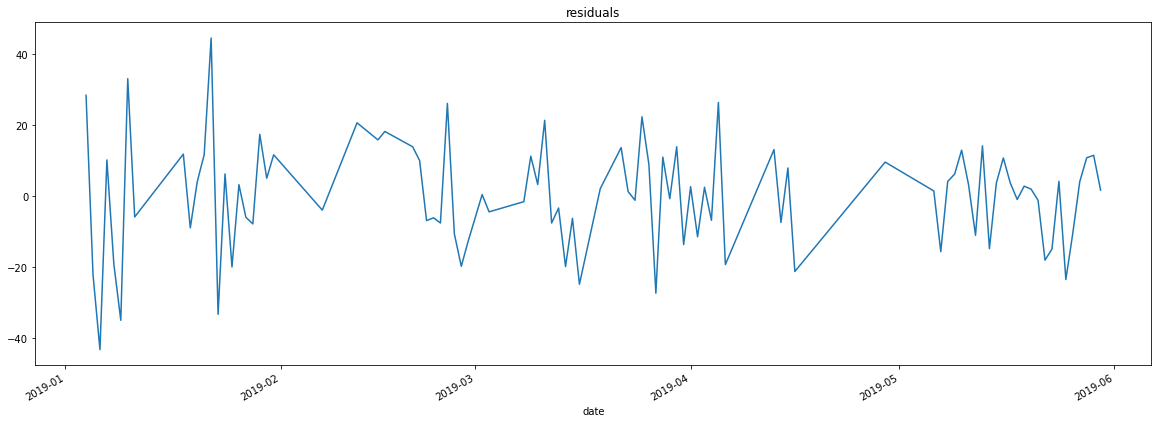

In [67]:
y=pd.DataFrame(X.pop('target'))
regression = regr.fit(X.values,y.values.reshape(-1,1))
y['predicted'] = regression.predict(X.values).reshape(1,-1)[0]
#trendln.plot(ax=axs)
regression.coef_
regression.score(X, y['target'])
(y['predicted']-y['target']).plot(title="residuals", figsize=(20,7))

'"\nX2[\'dow\']=X2.index.map(lambda x: dt.datetime.strftime(x,"%a"))\nX2= pd.merge(X2,pd.get_dummies(X2[\'dow\']),on=\'date\')\ndel X2[\'dow\']\n'

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     21.80
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.96e-18
Time:                        14:15:32   Log-Likelihood:                -387.27
No. Observations:                  93   AIC:                             794.5
Df Residuals:                      83   BIC:                             819.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co            -0.5683      0.655     -0.868      0.3

<AxesSubplot:title={'center':'residuals'}, xlabel='date'>

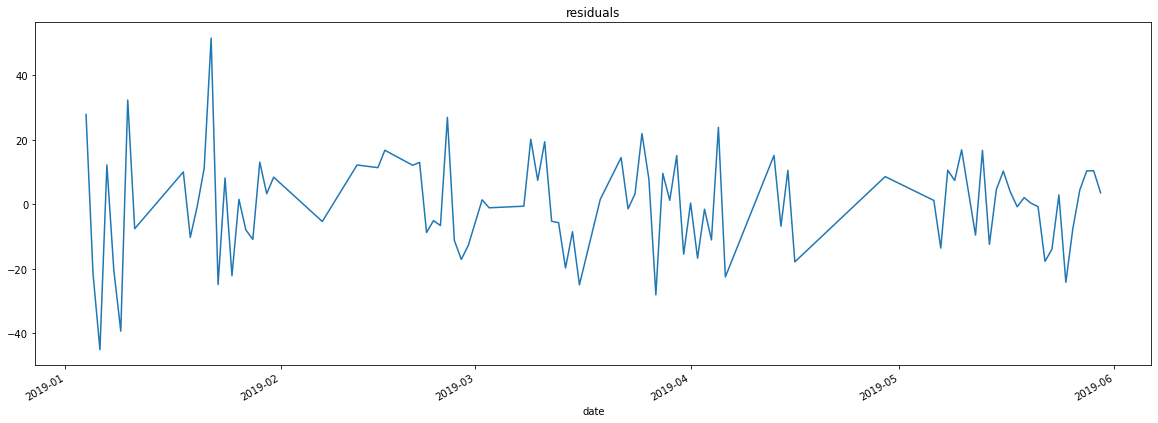

In [68]:
import statsmodels.api as sm
#[['pm25','pm10','o3']]
#[['pm25','pm10','o3','no2','so2','co',]]
X2 = sm.add_constant(X[X.columns.difference(['temp_max','temp_mean','temp_max','humidity','insolation','pressure'])], prepend=False)
""""
X2['dow']=X2.index.map(lambda x: dt.datetime.strftime(x,"%a"))
X2= pd.merge(X2,pd.get_dummies(X2['dow']),on='date')
del X2['dow']
"""

mod = sm.OLS(y['target'], X2)
res = mod.fit()
print(res.summary())

y['predicted']=res.predict(X2)
(y['predicted']-y['target']).plot(title="residuals",figsize=(20,7))

<AxesSubplot:title={'center':'ACF'}>

<AxesSubplot:title={'center':'PACF'}>

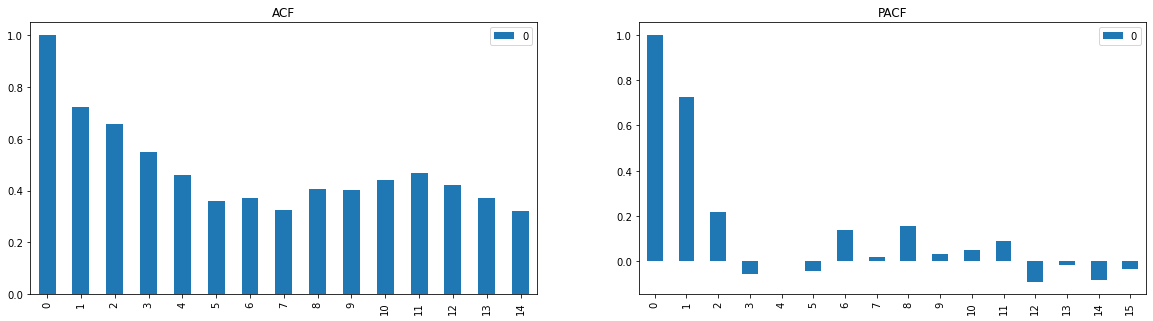

In [69]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

pd.DataFrame([y['target'].autocorr(i) for i in range(15)]).plot(kind='bar', title='ACF',ax=axs[0])
pd.DataFrame(sm.tsa.stattools.pacf(y.target.values,nlags=15)).plot(kind='bar', title='PACF',ax=axs[1])

In [70]:
y.target.head()

date
2019-01-04     94.0
2019-01-05    152.0
2019-01-06    168.0
2019-01-07    126.0
2019-01-08    144.0
Name: target, dtype: float64

period minimizing RMSE: 29


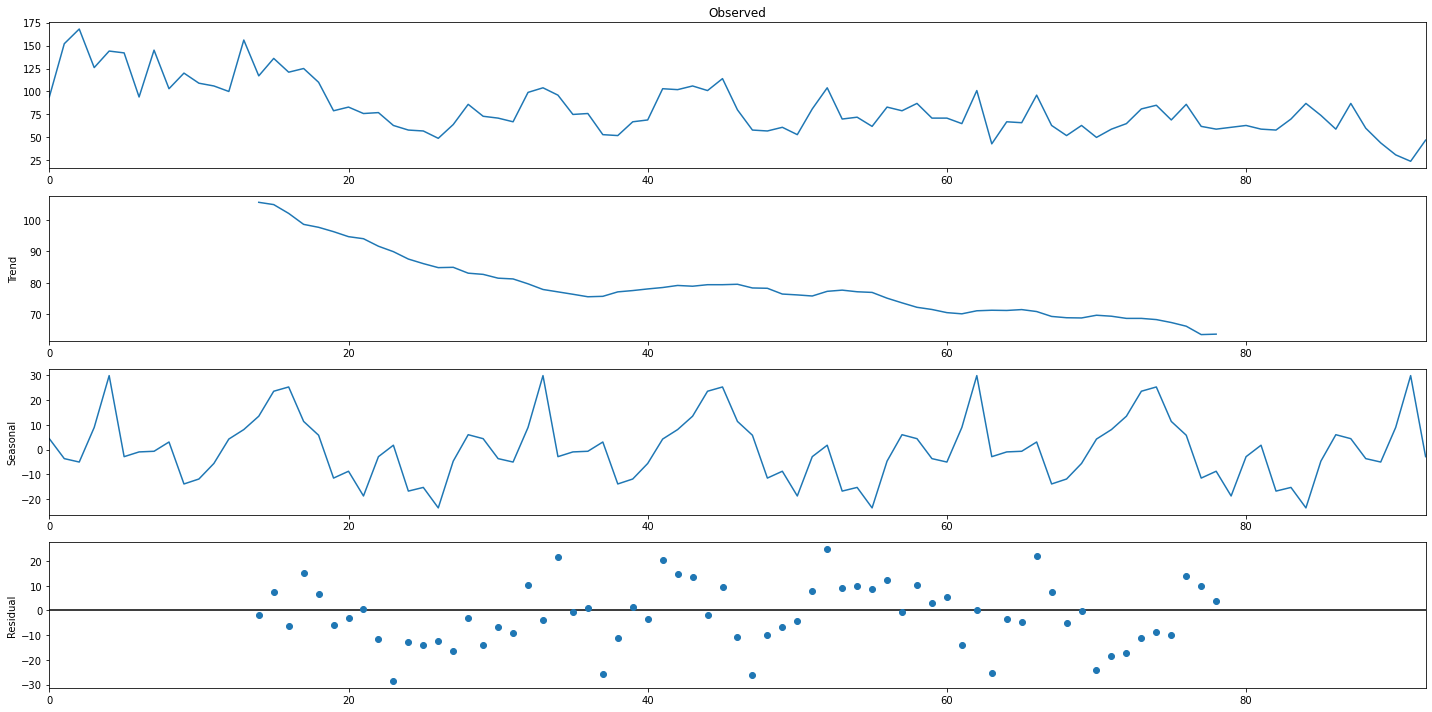

<AxesSubplot:>

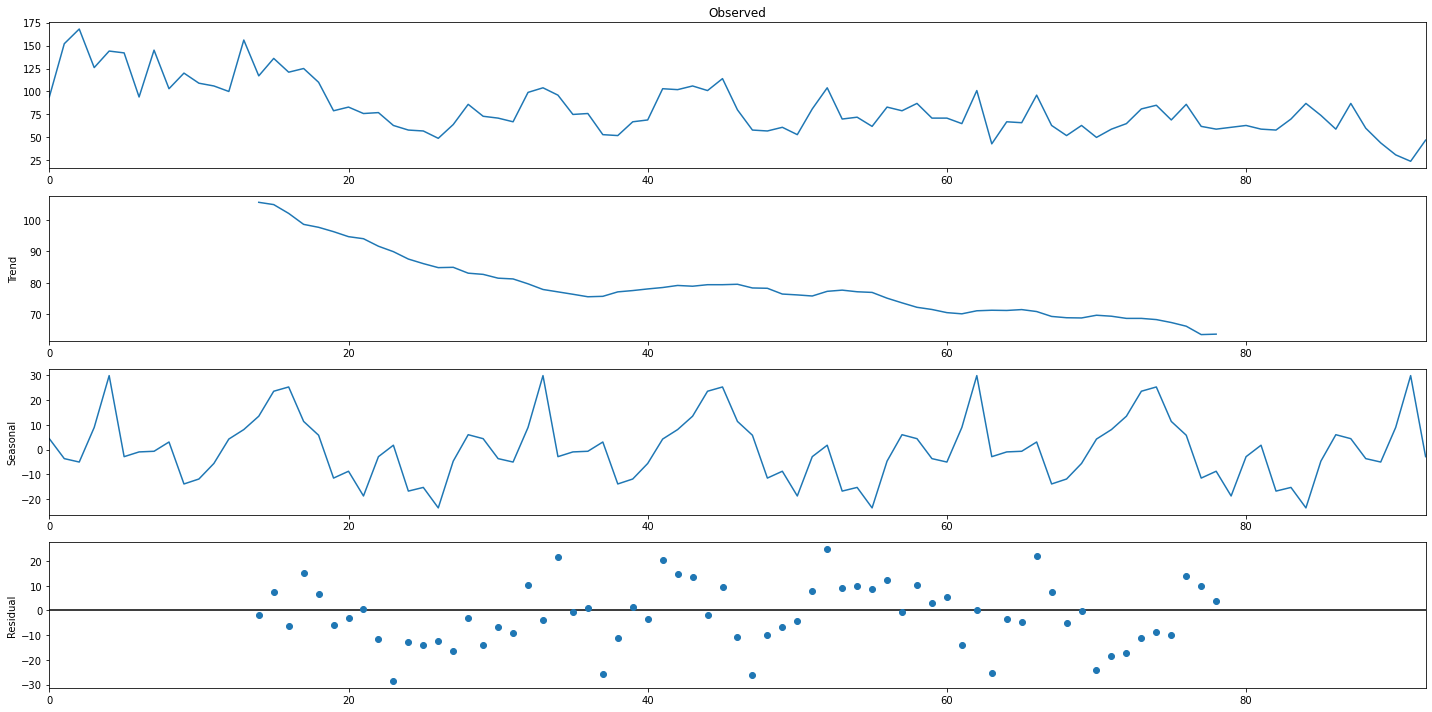

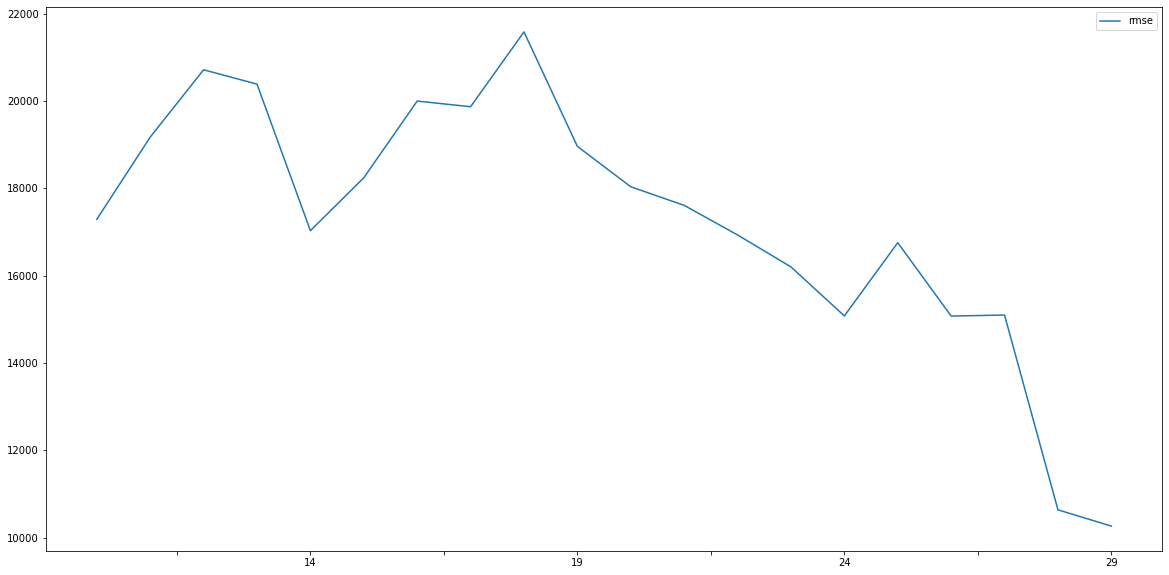

In [71]:
# ARIMA fitting  
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose

dfr=pd.DataFrame(columns=['rmse'],index=['per'])
minper,bestper=0,1
for per in range(10,30):
    res= seasonal_decompose(y.target.values,model ='additive', period=per)
    if per==10:
        minper, bestper = np.nansum(res.resid**2),per
    elif np.nansum(res.resid**2) < minper:
        minper= np.nansum(res.resid**2)
        bestper=per
    dfr.loc[per]=np.nansum(res.resid**2)
    
print("period minimizing RMSE: " + str(bestper))
pylab.rcParams['figure.figsize'] = (20, 10)
seasonal_decompose(y.target.values,model ='additive', period=bestper).plot()
dfr.plot()

In [74]:
#!conda install -c conda-forge pmdarima
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(y.target.values, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=738.559, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=773.105, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=747.079, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=749.367, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=780.735, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=754.390, Time=0.11 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=745.326, Time=0.22 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=739.413, Time=0.22 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=738.997, Time=0.41 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=738.426, Time=0.42 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=755.496, Time=0.16 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   93
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -363.213
Date:                              Mon, 29 Mar 2021   AIC                            738.426
Time:                                      14:16:32   BIC                            752.793
Sample:                                           0   HQIC                           744.190
                                               - 93                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.5191      2.016     -1.745      0.081      -7.471       0.433
ar.L1          0.5816      0.216      2.696      0.007       0.159       1.004
ma.L1         -0.1881      0.237     -0.794      0.427      -0.652       0.276
ma.L2          0.2126      0.167      1.272      0.203      -0.115       0.540
ma.S.L12      -0.8601      0.282     -3.047      0.002      -1.413      -0.307
sigma2       380.4579     96.066      3.960      0.000     192.172     568.744
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.85
Prob(Q):                              0.93   Prob(JB):                         0.24
Heteroskedasticity (H):               0.52   Skew:                            -0.41
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
PCA
ACF PACF ?
VAR ? 

R2 w.r.t calibration 
predictive power ?
over further time scales ?


SyntaxError: invalid syntax (<ipython-input-73-38e7ed29fef0>, line 2)